In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Visualization of CNN Layers and Filters

## Outline
1. Using torchvision.datasets with a custom folder of images
2. Occlusion analysis with pretrained model
3. Filter visualisation with pretrained model

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch 
import torch.nn as nn
import torchvision
#import datasets in torchvision
import torchvision.datasets as datasets

#import model zoo in torchvision
import torchvision.models as models
import torchvision.transforms as transforms

## Load dataset

In [ ]:
# #reading the labels of data we uploaded
# with open("data/imagenet_labels.txt") as f:
#     classes = eval(f.read())

In [ ]:
# print(classes)

{0: 'tench, Tinca tinca', 1: 'goldfish, Carassius auratus', 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 3: 'tiger shark, Galeocerdo cuvieri', 4: 'hammerhead, hammerhead shark', 5: 'electric ray, crampfish, numbfish, torpedo', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich, Struthio camelus', 10: 'brambling, Fringilla montifringilla', 11: 'goldfinch, Carduelis carduelis', 12: 'house finch, linnet, Carpodacus mexicanus', 13: 'junco, snowbird', 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea', 15: 'robin, American robin, Turdus migratorius', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water ouzel, dipper', 21: 'kite', 22: 'bald eagle, American eagle, Haliaeetus leucocephalus', 23: 'vulture', 24: 'great grey owl, great gray owl, Strix nebulosa', 25: 'European fire salamander, Salamandra salamandra', 26: 'common newt, Triturus vulgaris', 27: 'eft', 28: 'spotted salamander, Ambystoma maculatum', 29: 'axolotl, mu

In [ ]:
classes = {0: 'level_1', 1: 'level_2', 2: 'level_3'}

In [4]:
#defining the transformations for the data

transform = transforms.Compose([
    # transforms.Resize(224),
    transforms.ToTensor(),
    #normalize the images with imagenet data mean and std
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [5]:
#define the data we uploaded as evaluation data and apply the transformations

# evalset = torchvision.datasets.ImageFolder(root = "./data/imagenet", transform = transform)
evalset = torchvision.datasets.ImageFolder(root = "/content/drive/My Drive/msw_penalty_1000", transform = transform)

In [6]:
#create a data loader for evaluation

batch_size=1 #batch size
evalloader = torch.utils.data.DataLoader(evalset, batch_size = batch_size, shuffle = True)

In [8]:
#looking at data using iter

dataiter = iter(evalloader)
images, labels = dataiter.next()

#shape of images bunch
print(images.shape)
#shape of single image in a bunch
print(images[0].shape)

#label of the image
print(labels[0].item())
# print(labels[0])

torch.Size([1, 3, 150, 150])
torch.Size([3, 150, 150])
2


## Load pretrained model

In [ ]:
#for visualization we will use vgg16 pretrained on imagenet data

# model = models.vgg16(pretrained=True)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = torch.load('/content/drive/My Drive/project_models/msw_m', map_location='cpu')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [ ]:
# model = models.resnext50_32x4d(pretrained=True)
# model.eval()
# torch.save(model,'resnext_raw.pt')

In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = torch.load('/content/drive/My Drive/project_models/resnext_raw', map_location=device)
# model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [ ]:
#PRASHANT'S MODEL
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [ ]:
# model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

## Visualise image

In [ ]:
def imshow(img, title):
  
  """Custom function to display the image using matplotlib"""
  
  #define std correction to be made
  std_correction = np.asarray([0.229, 0.224, 0.225]).reshape(3, 1, 1)
  
  #define mean correction to be made
  mean_correction = np.asarray([0.485, 0.456, 0.406]).reshape(3, 1, 1)
  
  #convert the tensor img to numpy img and de normalize 
  npimg = np.multiply(img.numpy(), std_correction) + mean_correction
  
  #plot the numpy image
  plt.figure(figsize = (batch_size * 4, 4))
  plt.axis("off")
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.title(title)
  plt.show()

In [ ]:
#custom function to fetch images from dataloader

def show_batch_images(dataloader):
  images,labels = next(iter(dataloader))
  
  #run the model on the images
  outputs = model(images)
  
  print(outputs.size())

  #get the maximum class 
  _, pred = torch.max(outputs.data, 1)
  
  #make grid
  img = torchvision.utils.make_grid(images)
  
  #call the function
  print(pred)
  title=[classes[x.item()] for x in labels]
  # print(title)
  imshow(img, title)
  
  return images, pred

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3])
tensor([0])


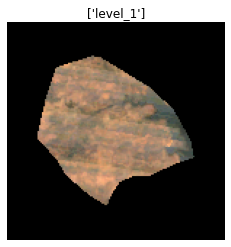

In [ ]:
images, pred = show_batch_images(evalloader)

In [ ]:
# Check how many images are being classified correctly
sum0, sum1, sum2 = 0, 0, 0
from tqdm import tqdm

for images, label in tqdm(evalloader):

  images = images.cuda()
  outputs = model(images)
  _, pred = torch.max(outputs, 1)
  
  # print(outputs)
  for i in pred:
    if i == 0:
      sum0 += 1
    elif i == 1:
      sum1 += 1
    else:
      sum2 += 1

print(sum0, sum1, sum2)

100%|██████████| 3000/3000 [00:50<00:00, 59.05it/s]

251 2415 334


In [ ]:
print(sum0, sum1, sum2)

251 2415 334


In [ ]:
# Generate confusion matrices for the given data
import numpy as np
import time

# initialize the confusion matrix
conf = np.zeros((3,3))
batch = 0

for images, labels in evalloader:
  start = time.time()
  batch += 1

  if torch.cuda.is_available():
    images = images.cuda()
    labels = labels.cuda()

  outputs = model(images)
  _, preds = torch.max(outputs, 1)

  # labels, preds = labels.type(torch.LongTensor), preds = preds.type(torch.LongTensor)

  for i in range(preds.size()[0]):
    conf[labels[i],preds[i]] += 1

  end = time.time()

  print("Batch {} completed.".format(batch))
  print("Time taken: {} minutes".format((end-start)/60.0))

Streaming output truncated to the last 5000 lines.
Batch 501 completed.
Time taken: 0.0002109368642171224 minutes
Batch 502 completed.
Time taken: 0.00024241209030151367 minutes
Batch 503 completed.
Time taken: 0.0002279361089070638 minutes
Batch 504 completed.
Time taken: 0.00022074381510416667 minutes
Batch 505 completed.
Time taken: 0.0002163410186767578 minutes
Batch 506 completed.
Time taken: 0.00021587610244750978 minutes
Batch 507 completed.
Time taken: 0.0002159277598063151 minutes
Batch 508 completed.
Time taken: 0.00021709601084391277 minutes
Batch 509 completed.
Time taken: 0.00021207729975382487 minutes
Batch 510 completed.
Time taken: 0.0002175291379292806 minutes
Batch 511 completed.
Time taken: 0.00021764834721883138 minutes
Batch 512 completed.
Time taken: 0.0002162933349609375 minutes
Batch 513 completed.
Time taken: 0.00021929740905761718 minutes
Batch 514 completed.
Time taken: 0.00021755297978719076 minutes
Batch 515 completed.
Time taken: 0.000217743714650472 minut

AxesSubplot(0.125,0.125;0.62x0.755)


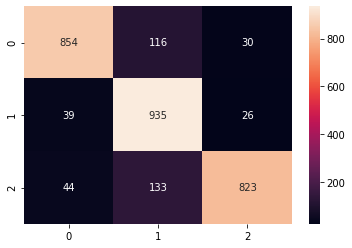

In [ ]:
# Visualize the confusion matrix
import seaborn as sns
import pandas as pd

# conf_new = pd.DataFrame(conf)
# conf_new = conf_new.rename(columns={0:'True Class', 1:'Predicted Class'})
# conf_new = conf_new.pivot('True Class', 'Predicted Class', 2)
# # print(conf_new)

print(sns.heatmap(conf, annot=True, fmt='g'))

## Occlusion analysis

In [ ]:
#running inference on the images without occlusion

#vgg16 pretrained model
outputs = model(images)
print(outputs.shape)

#passing the outputs through softmax to interpret them as probability
outputs = nn.functional.softmax(outputs, dim = 1)

#getting the maximum predicted label
prob_no_occ, pred = torch.max(outputs.data, 1)

#get the first item
prob_no_occ = prob_no_occ[0].item()

print(outputs.data)
print(prob_no_occ)
print(pred)

torch.Size([1, 3])
tensor([[0.9616, 0.0364, 0.0019]])
0.9616472721099854
tensor([0])


In [ ]:
#custom function to conduct occlusion experiments

def occlusion(model, image, label, occ_size = 50, occ_stride = 50, occ_pixel = 0.5):
  
    #get the width and height of the image
    width, height = image.shape[-2], image.shape[-1]
  
    #setting the output image width and height
    output_height = int(np.ceil((height-occ_size)/occ_stride))
    output_width = int(np.ceil((width-occ_size)/occ_stride))
  
    #create a white image of sizes we defined
    heatmap = torch.zeros((output_height, output_width))
    
    #iterate all the pixels in each column
    for h in range(0, height):
        for w in range(0, width):
            
            h_start = h*occ_stride
            w_start = w*occ_stride
            h_end = min(height, h_start + occ_size)
            w_end = min(width, w_start + occ_size)
            
            if (w_end) >= width or (h_end) >= height:
                continue
            
            input_image = image.clone().detach()
            
            #replacing all the pixel information in the image with occ_pixel(grey) in the specified location
            input_image[:, :, w_start:w_end, h_start:h_end] = occ_pixel
            
            #run inference on modified image
            output = model(input_image)
            output = nn.functional.softmax(output, dim=1)
            prob = output.tolist()[0][label]
            
            #setting the heatmap location to probability value
            heatmap[h, w] = prob 

    return heatmap

In [ ]:
heatmap = occlusion(model, images, pred[0].item(), 50, 14)

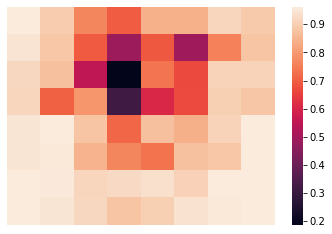

In [ ]:
#displaying the image using seaborn heatmap and also setting the maximum value of gradient to probability
imgplot = sns.heatmap(heatmap, xticklabels=False, yticklabels=False, vmax=prob_no_occ)
figure = imgplot.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

## Filter visualisation

In [ ]:
#for filter visualization, we will use alexnet pretrained with imagenet data

alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
#structure of the alexnet
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
def plot_filters_single_channel_big(t):
    
    #setting the rows and columns
    nrows = t.shape[0]*t.shape[2]
    ncols = t.shape[1]*t.shape[3]
    
    
    npimg = np.array(t.numpy(), np.float32)
    npimg = npimg.transpose((0, 2, 1, 3))
    npimg = npimg.ravel().reshape(nrows, ncols)
    
    npimg = npimg.T
    
    fig, ax = plt.subplots(figsize=(ncols/10, nrows/200))    
    imgplot = sns.heatmap(npimg, xticklabels=False, yticklabels=False, cmap='gray', ax=ax, cbar=False)

In [ ]:
def plot_filters_single_channel(t):
    
    #kernels depth * number of kernels
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_filters_multi_channel(t):
    
    #get the number of kernals
    num_kernels = t.shape[0]    
    
    #define number of columns for subplots
    num_cols = 12
    #rows = num of kernels
    num_rows = num_kernels
    
    #set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    #looping through all the kernels
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        #for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i].numpy(), np.float32)
        #standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
    plt.savefig('myimage.png', dpi=100)    
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_weights(model, layer_num, single_channel = True, collated = False):
  
  #extracting the model features at the particular layer number
  layer = model.features[layer_num]
  
  #checking whether the layer is convolution layer or not 
  if isinstance(layer, nn.Conv2d):
    #getting the weight tensor data
    weight_tensor = model.features[layer_num].weight.data
    
    if single_channel:
      if collated:
        plot_filters_single_channel_big(weight_tensor)
      else:
        plot_filters_single_channel(weight_tensor)
        
    else:
      if weight_tensor.shape[1] == 3:
        plot_filters_multi_channel(weight_tensor)
      else:
        print("Can only plot weights with three channels with single channel = False")
        
  else:
    print("Can only visualize layers which are convolutional")

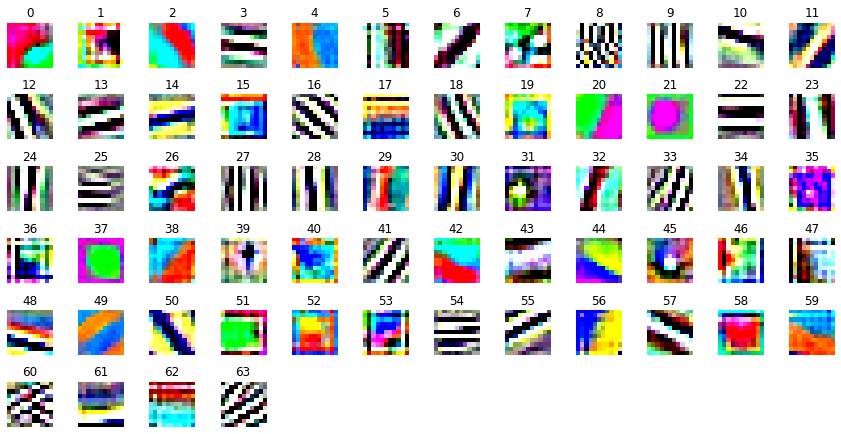

In [ ]:
#visualize weights for alexnet - first conv layer

plot_weights(alexnet, 0, single_channel = False)

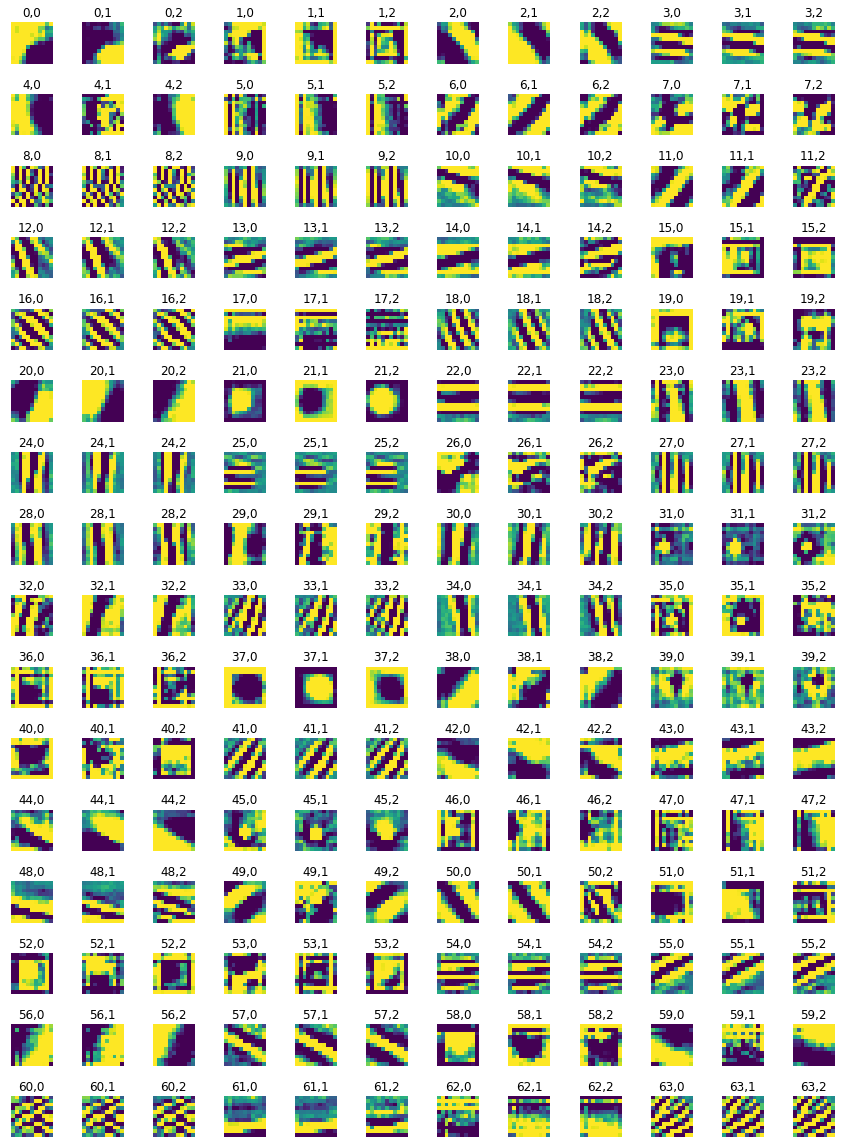

In [ ]:
#plotting single channel images

plot_weights(alexnet, 0, single_channel = True)

In [ ]:
#plot for 3rd layer -> 2nd conv layer
plot_weights(alexnet, 3, single_channel = True)

In [ ]:
 plot_weights(alexnet, 0, single_channel = True, collated = True)

In [ ]:
plot_weights(alexnet, 3, single_channel = True, collated = True)

In [ ]:
plot_weights(alexnet, 6, single_channel = True, collated = True)

In [ ]:
#for vgg16

plot_weights(model, 0, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 2, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 5, single_channel = True, collated = True)

In [ ]:
plot_weights(model, 0, single_channel = False, collated = False)

In [ ]:
import numpy as np
from torch.autograd import Variable

conf = np.zeros((3,3))

rows = torch.Tensor([0.0,1.0,2.0])
cols = torch.Tensor([1.0,2.0,0.0])

print(rows.size())
rows, cols = rows.numpy().astype(int), cols.numpy().astype(int)
# rows, cols = rows.astype(int), cols.astype(int)
conf[rows, cols] += 1

print(conf)

torch.Size([3])
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


TEST


In [ ]:
img_transform = transforms.Compose([
    # transforms.Resize(224),
    transforms.ToTensor(),
    #normalize the images with imagenet data mean and std
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [ ]:
import os
from skimage import io, transform

In [ ]:
filename_list = []
IMAGE_DIR = '/content/drive/MyDrive/msw_1000_1/0'

for fl in os.listdir(IMAGE_DIR):
  filename_list += [fl]

In [ ]:
filename_list

In [ ]:
class IDataset:

  def __init__(self, img_dir, name_list):

    self.img_dir = img_dir
    self.name_list = name_list

  def __len__(self):
    return len(self.name_list)

  def __getitem__(self, idx):

    vill_rev = self.name_list[idx][::-1]
    dot = vill_rev.find('.')
    at = vill_rev.find('@')
    vill_id = int((vill_rev[dot+1:at])[::-1])
    
    img_name = os.path.join(self.img_dir, self.name_list[idx])
    image = io.imread(img_name)
    image = img_transform(image)

    sample = {'image': image, 'vill_id': vill_id}
    return sample
    

In [ ]:
from torch.utils.data import Dataset, DataLoader

train_dataset = IDataset(
    IMAGE_DIR, filename_list)

BATCH_SIZE = 5
NUM_WORKERS = 2

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = torch.load('/content/drive/My Drive/project_models/msw_m', map_location=device)
model.eval()

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torchvision.models.resnet.ResNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [ ]:
for batch_idx, sample in enumerate(train_loader):
  image, vill_id = sample['image'], sample['vill_id']

  if torch.cuda.is_available():
    image = image.cuda()

  outputs = model(image)
  print(vill_id)
  break

tensor([210703, 602973, 581077, 406996, 362587])


In [ ]:
x = torch.LongTensor([3,2])
# for i in range(x.size[0]):
#   x
print(int(x[0]))

3


In [ ]:
x = [1,2,3]
x += [4,5,6]
x

[1, 2, 3, 4, 5, 6]